In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [3]:
salary_df = pd.read_csv('dev_salary_data.csv')
salary_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
salary_df.shape

(89184, 84)

In [7]:
salary_df.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [9]:
salary_df = salary_df[['Age' ,'EdLevel', 'YearsCodePro', 'Country','ConvertedCompYearly']]
salary_df = salary_df.rename({'ConvertedCompYearly':'Salary'},axis=1)
salary_df.head()

,Age,EdLevel,YearsCodePro,Country,Salary
0,18-24 years old,NaN,NaN,NaN,NaN
1,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,United States of America,285000.0
2,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,United States of America,250000.0
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,United States of America,156000.0
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Philippines,23456.0


In [11]:
salary_df.isnull().sum()

Age                 0
EdLevel          1211
YearsCodePro    23048
Country          1211
Salary          41165
dtype: int64

In [13]:
salary_df.shape

(89184, 5)

In [15]:
salary_df = salary_df.dropna()
salary_df.isnull().sum()

Age             0
EdLevel         0
YearsCodePro    0
Country         0
Salary          0
dtype: int64

In [17]:
salary_df.shape

(47825, 5)

In [19]:
salary_df.value_counts('Age')

Age
25-34 years old       22079
35-44 years old       13786
18-24 years old        4906
45-54 years old        4842
55-64 years old        1793
65 years or older       335
Under 18 years old       54
Prefer not to say        30
Name: count, dtype: int64

In [21]:
age_mapping = {
    '25-34 years old': 30,
    '35-44 years old': 40,
    '18-24 years old': 18,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Under 18 years old': 18,
    'Prefer not to say': None
}
# Apply the mapping
salary_df['Age'] = salary_df['Age'].replace(age_mapping)

C:\Users\John Daison\AppData\Local\Temp\ipykernel_26612\2546659214.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_df['Age'] = salary_df['Age'].replace(age_mapping)


In [23]:
salary_df.isnull().sum()

Age             30
EdLevel          0
YearsCodePro     0
Country          0
Salary           0
dtype: int64

In [25]:
salary_df = salary_df.dropna()
salary_df.isnull().sum()

Age             0
EdLevel         0
YearsCodePro    0
Country         0
Salary          0
dtype: int64

In [27]:
salary_df.value_counts('Age')

Age
30.0    22079
40.0    13786
18.0     4960
50.0     4842
60.0     1793
65.0      335
Name: count, dtype: int64

In [29]:
salary_df.value_counts('Country')

Country
United States of America                                11828
Germany                                                  3945
United Kingdom of Great Britain and Northern Ireland     3519
Canada                                                   2095
India                                                    1850
                                                        ...  
Lesotho                                                     1
Saint Vincent and the Grenadines                            1
Saint Kitts and Nevis                                       1
Mauritania                                                  1
Liechtenstein                                               1
Name: count, Length: 171, dtype: int64

In [31]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [33]:
country_map = shorten_categories(salary_df.Country.value_counts(),400)
salary_df['Country'] = salary_df['Country'].map(country_map)
salary_df.Country.value_counts()

Country
United States of America                                11828
Other                                                    8309
Germany                                                  3945
United Kingdom of Great Britain and Northern Ireland     3519
Canada                                                   2095
India                                                    1850
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1204
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1010
Switzerland                                               659
Austria                                                   531


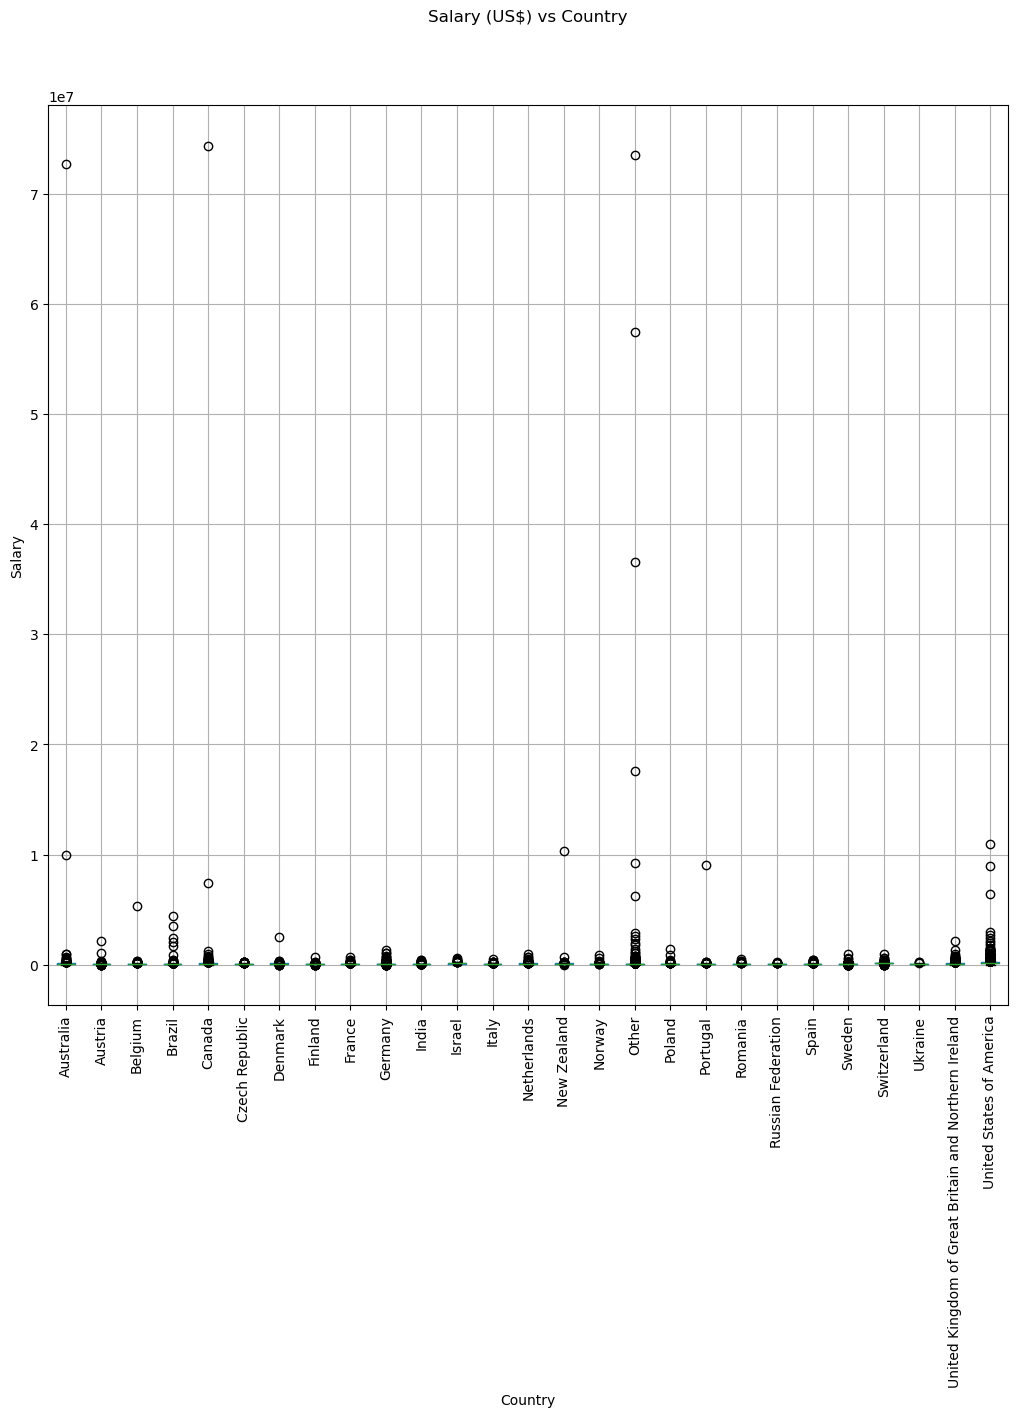

In [35]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
salary_df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

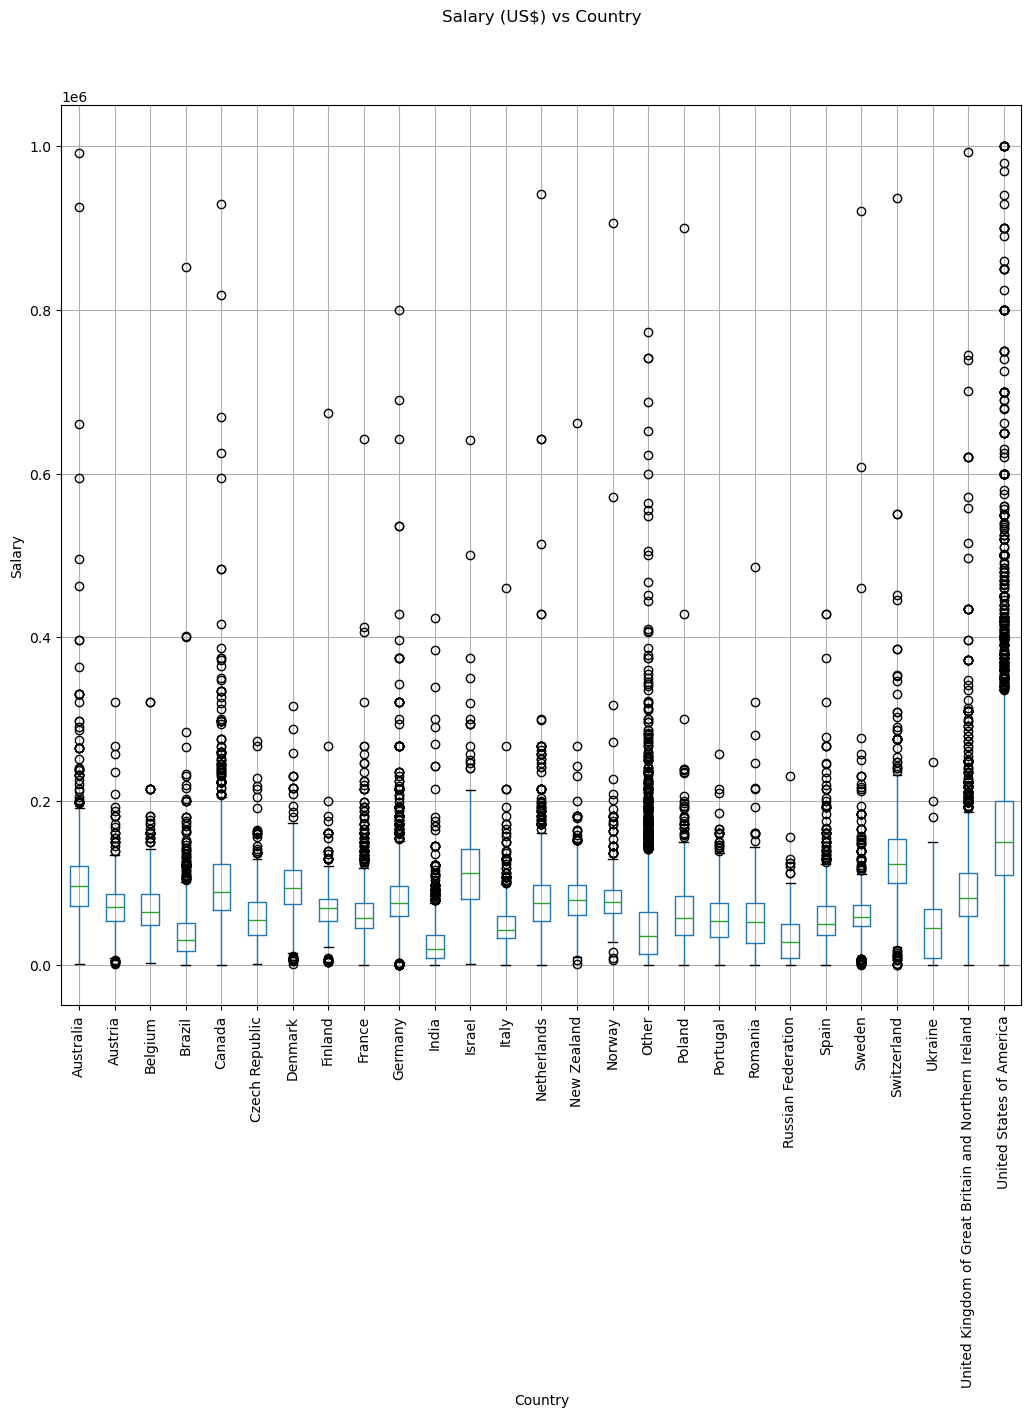

In [37]:
salary_df = salary_df[salary_df['Salary'] <= 1000000]

fig, ax = plt.subplots(1,1,figsize=(12,12))
salary_df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

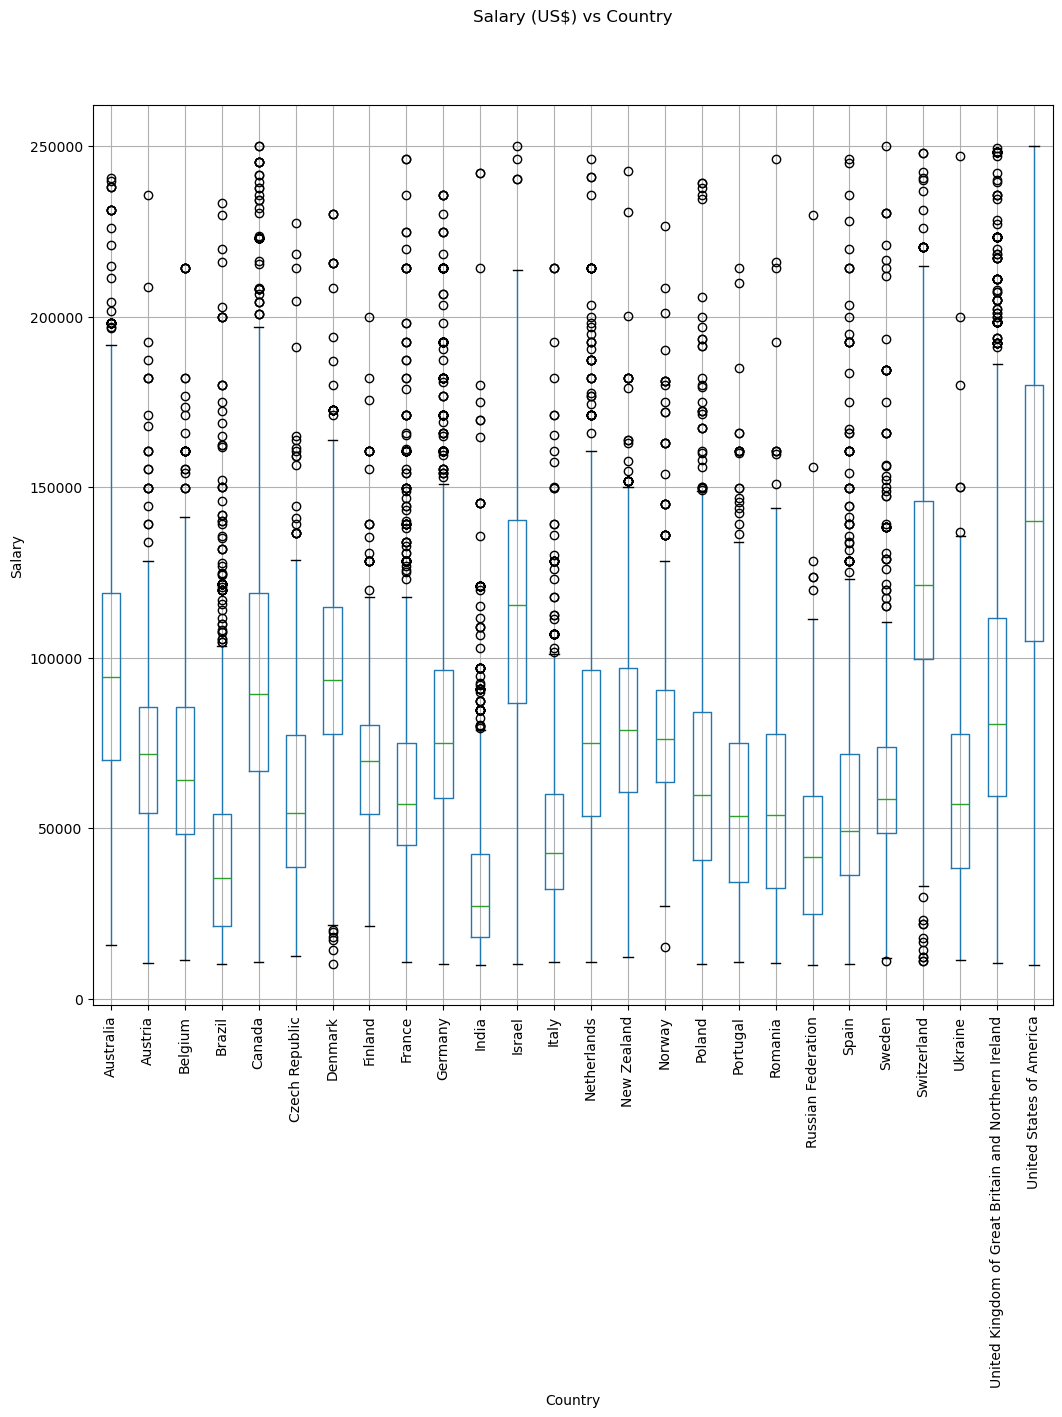

In [39]:
salary_df = salary_df[salary_df['Salary'] <= 250000]
salary_df = salary_df[salary_df['Salary'] >= 10000]
salary_df = salary_df[salary_df['Country'] != 'Other']

fig, ax = plt.subplots(1,1,figsize=(12,12))
salary_df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [41]:
salary_df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '30', '24', '40', '4',
       '25', '12', '20', '11', '8', '18', '50', '27', '17', '43', '26',
       '38', '33', '29', '22', '1', '31', '34', '37', '42',
       'More than 50 years', '36', '39', '35', '41', '32', '44', '48',
       '45', '46', '47', '49'], dtype=object)

In [43]:
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 55
    return float(x)

salary_df['YearsCodePro'] = salary_df['YearsCodePro'].apply(clean_experience)

In [45]:
salary_df["YearsCodePro"].unique()

array([23. ,  7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,
        5. , 19. , 13. , 16. , 28. , 30. , 24. , 40. ,  4. , 25. , 12. ,
       20. , 11. ,  8. , 18. , 50. , 27. , 17. , 43. , 26. , 38. , 33. ,
       29. , 22. ,  1. , 31. , 34. , 37. , 42. , 55. , 36. , 39. , 35. ,
       41. , 32. , 44. , 48. , 45. , 46. , 47. , 49. ])

In [47]:
salary_df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [49]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or 'Other doctoral' in x:
        return "Post grad"
    return "Less than a Bachelor's"
salary_df['EdLevel'] = salary_df['EdLevel'].apply(clean_education)

In [51]:
salary_df['EdLevel'].unique()

array(["Bachelor's degree", "Less than a Bachelor's", "Master's degree",
       'Post grad'], dtype=object)

In [53]:
le_edu = LabelEncoder()
salary_df['EdLevel'] = le_edu.fit_transform(salary_df['EdLevel'])
salary_df['EdLevel'].unique()

array([0, 1, 2, 3])

In [55]:
salary_df.value_counts('Country')

Country
United States of America                                10524
Germany                                                  3851
United Kingdom of Great Britain and Northern Ireland     3439
Canada                                                   2023
France                                                   1771
Netherlands                                              1324
India                                                    1296
Poland                                                   1184
Australia                                                1171
Spain                                                    1125
Brazil                                                   1071
Sweden                                                   1014
Italy                                                     994
Switzerland                                               619
Austria                                                   516
Denmark                                                   498


In [57]:
le_country = LabelEncoder()
salary_df['Country'] = le_country.fit_transform(salary_df['Country'])
salary_df['Country'].unique()

array([25, 24,  7,  0, 13,  9, 21,  8, 20,  3, 17, 12,  4, 22, 10,  1, 15,
       19, 16,  2,  6, 11, 23,  5, 18, 14])

In [59]:
salary_df.head()

,Age,EdLevel,YearsCodePro,Country,Salary
2,50.0,0,23.0,25,250000.0
3,30.0,0,7.0,25,156000.0
5,40.0,1,21.0,24,96828.0
6,40.0,1,3.0,25,135000.0
7,30.0,0,3.0,25,80000.0


<Axes: >

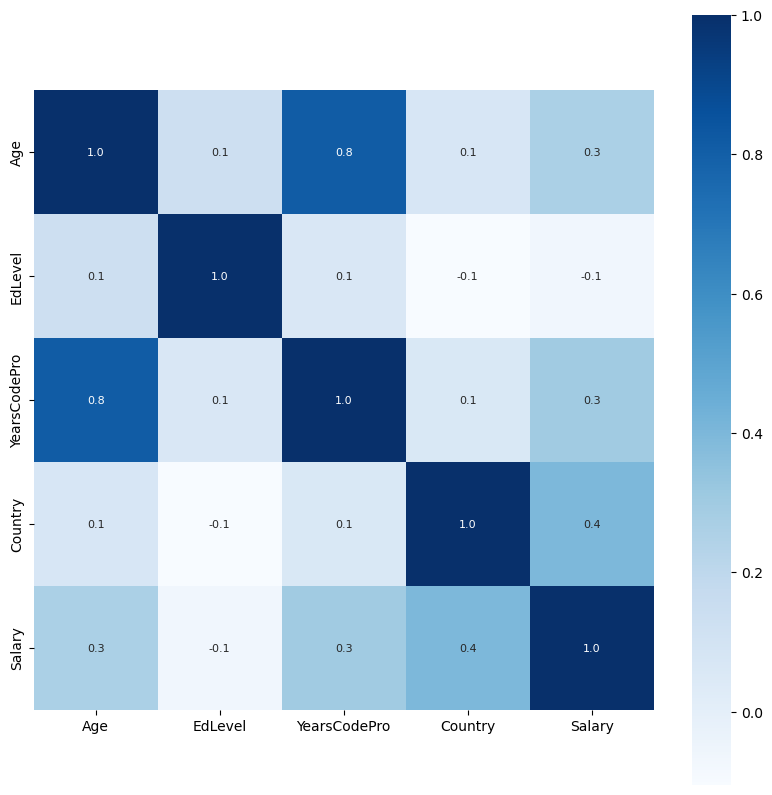

In [61]:
corelation = salary_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [63]:
Y = salary_df['Salary']
X = salary_df.drop('Salary',axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(36525, 4) (29220, 4) (7305, 4)


In [67]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
train_prediction = model.predict(X_train)
print(train_prediction)

[ 52742.746 125631.23   73067.1   ... 135084.2    52539.34  163548.5  ]


In [71]:
#R squared error
score_1 = metrics.r2_score(y_train, train_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, train_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5835934657011368
Mean Absolute Error :  24955.201153627117


In [73]:
test_prediction = model.predict(X_test)

#R squared error
score_1 = metrics.r2_score(y_test, test_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.5342562184210862
Mean Absolute Error :  26534.961796821528


In [75]:
tree_model = RandomForestRegressor(random_state=0)
tree_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [77]:
train_prediction = tree_model.predict(X_train)

In [79]:
#R squared error
score_1 = metrics.r2_score(y_train, train_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, train_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.6217125255471915
Mean Absolute Error :  23551.304836874384


In [81]:
test_prediction = tree_model.predict(X_test)

#R squared error
score_1 = metrics.r2_score(y_test, test_prediction)

#Mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.49542415133857953
Mean Absolute Error :  27678.50210946902


In [83]:
X

,Age,EdLevel,YearsCodePro,Country
2,50.0,0,23.0,25
3,30.0,0,7.0,25
5,40.0,1,21.0,24
6,40.0,1,3.0,25
7,30.0,0,3.0,25
...,...,...,...,...
89156,30.0,0,8.0,25
89158,30.0,0,8.0,21
89162,40.0,2,24.0,3
89167,18.0,0,2.0,10


In [117]:
input = np.array([[35,"Master's degree","Spain",10]])
input

array([['35', "Master's degree", 'Spain', '10']], dtype='<U15')

In [119]:
input[:,1] = le_edu.transform(input[:,1])
input[:,2] = le_country.transform(input[:,2])
input = input.astype(float)
input

array([[35.,  2., 20., 10.]])

In [115]:
# Handle unseen labels
try:
    input[:, 1] = le_edu.transform(input[:, 1])
except ValueError as e:
    print(f"Unseen label in education level: {e}")

try:
    input[:, 2] = le_country.transform(input[:, 2])
except ValueError as e:
    print(f"Unseen label in country: {e}")

input = input.astype(float)
print(input)

[[35.  2. 12. 10.]]


In [101]:
prediction = model.predict(input)
prediction

array([46146.066], dtype=float32)

In [103]:
import pickle

data = {"model":model, "le_country":le_country,"le_education":le_edu}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [105]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

model_loaded = data['model']
le_country = data['le_country']
le_education = ['le_education']

In [107]:
prediction = model.predict(input)
prediction

array([46146.066], dtype=float32)